# Accent Recognition

The objective of this coursework is to analyze a multi-class dataset to determine if it is linearly separable in its original feature space, in the feature space defined by Principal Component Analysis (PCA), in a new feature space with very high dimensions, or in all three feature spaces. To this end, we will use a multi-class perceptron to determine if the data is linearly separable and a non-linear version of PCA to project the dataset onto a very high-dimensional feature space.

# Section A: Data Visualization

The code below gets the data set from the .data file and extracts the targets and feature vectors. A unique numerical value from 0-5 is assigned for each class.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_classification
from IPython.display import Image
import math
import matplotlib.pyplot as plt
import random


labels = ["A","B","C","D","E","F","G","H","I","J","K","L","M",]
df = pd.read_csv('accent-mfcc-data-1.data', names = labels)
data = df.iloc[:,1:] # Getting the feature vectors without the target value
features = data.to_numpy() # Representing the feature vectors in a 2D array
targetDF = df.iloc[:,0:1] # Getting only the target data for each feature vector
target = targetDF.to_numpy() # Representing the targets as an array 
classes = 6
for i in range(len(target)): # Changing the 6 target classes into unique numbers from 0 to 5
    if target[i] == "ES" :
        target[i] = 0
    if target[i] == "FR" :
        target[i] = 1
    if target[i] == "GE" :
        target[i] = 2
    if target[i] == "IT" :
        target[i] = 3
    if target[i] == "UK" :
        target[i] = 4
    if target[i] == "US" :
        target[i] = 5

The below code is an implementation of PCA based on SVD. It centres the data by subtracting the mean from each value and then returns the decomposition U,S,V such that X = USV.

In [20]:
def PCA_decomp(X):
    mu = np.mean(X, axis = 0) # Calculating the mean of each feature
    X = X - mu # Centering the data by subtracting the mean off each feature 
    U, S, V = np.linalg.svd(X, full_matrices=True, compute_uv=True) # Using singular value decomposition where X = USV
    return U, S, V
U, S, V = PCA_decomp(features)

The below code iterates through all examples and uses the top 2 PCs on a graph to visualise the data and see if it is linearly separable. Each class is represented on the graph by a different colour.

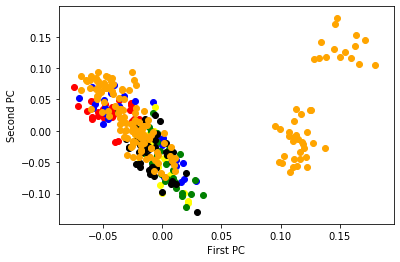

Variance Captured:  0.6816284673318027


In [21]:
for i in range(329): # Plotting each data using only the top 2 principle components. Using a seperate colour for each class
    if target[i] == 0:
        plt.scatter(U[i][0], U[i][1], color = "red")
    if target[i] == 1:
        plt.scatter(U[i][0], U[i][1], color = "blue")
    if target[i] == 2:
        plt.scatter(U[i][0], U[i][1], color = "yellow")
    if target[i] == 3:
        plt.scatter(U[i][0], U[i][1], color = "green")
    if target[i] == 4:
        plt.scatter(U[i][0], U[i][1], color = "black")
    if target[i] == 5:
        plt.scatter(U[i][0], U[i][1], color = "orange")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()
variance_captured = np.sum(np.square(S[0:2])) / np.sum(np.square(S)) # Calculates the variance captured within the scatter diagram
print("Variance Captured: ", variance_captured)

**Discussion discussions explaining if the dataset is linearly separable in 2d:**\
Linear PCA decomposition has been used to split the data into the form X = USV, where V is stores the principle components (PCs). By considering the top 2 PCs we can visualise the data to determine if the dataset is linearly seperable in 2 dimensions. The dataset is clearly not linearly seperable in 2 dimensions when considering the top 2 PCs. This is because there is a group of 5 classes mixed together so it would not be possible to seperate the classes with high accuracy. By using the top 2 principle components 68% of the variance in the dataset is captured.

# Section B: Determining If The Dataset Is Linearly Separable

## Multi-class Perceptron

**Implementation of the multi-class perceptron:**\
The algorithm stated in the coursework specification has been implemented. All uses of the multi-class perceptron use 10 iterations in this coursework.\
The perceptron function first defines the weights matrix (Num of classes * Num_of_features) to contain all zeros. Then for each iteration all available examples are shuffled into random order such that each target still has the same index as the corresponding feature vector. It then iterates over every feature vector and correct the weight matrix if a class was classified incorrectly. It predicts the class by selecting the class with the largest activation. If the prediction is correct we move onto the next feature vector. If the predicition is wrong then we refine the solution of the weights by adding to the correct class and subtracting from the predicted class. After all feature vectors have been classified we repeat these steps with the new weight vector as the initial solution for next iteration. After all iterations are complete the weight vector is returned.
\
\
The weight vector is used to predict the class of each feature vector by selecting the class with the highest activation. This is done in the predict function, which has feature vectors and weight vector as inputs and returns an array of the predicted classses. This array is then used to calculate accuracy in the numWrong function where the predicted class is compared with the actual targets.

### Original Feature Space

The below code adds a bias feature to all feature vectors and defines a function that shuffles the examples and their targets so the targets are at the same index as the original example.

In [22]:
bias_ones = np.ones((len(features), 1))
X = np.hstack((features, bias_ones)) # Adding a bias to each of the feature vectors
Y = target.flatten().astype(int) 

def unison_shuffled_copies(a, b): # Shuffles two arrays such that the corresponding index is the same as before they were shuffle
    p = np.random.permutation(len(a))
    return a[p], b[p]

The code below defines the perceptron algorithm that performs a certain number of iterations and corrects the weights when the class is predicted incorrectly. It corrects the weights by adding the feature to the correct weight class and subtracting the feature from the predicted weight class. \
The perceptron algorithm is used to predict the examples in their original feature space. Displaying the number of errors and the percentage accuracy.

In [23]:
def perceptron(X, Y, epochs):
    w = np.zeros((classes, X.shape[1])) # Defining a weight matrix (Num of classes * Num_of_features) to store each weight vectors with initial weights 0
    for _ in range(epochs): # The number of iterations
        X,Y = unison_shuffled_copies(X,Y) # Shuffle the data after each iteration
        for category, feature in zip(Y, X): # Iterating over each feature vector and its respective target value
            arg_max, predicted_class = np.dot(feature, w[0]), 0 # Initialize arg_max value, predicted class
            # Classify feature
            for i in range(classes): # Iterate over every class and select the class that yields the greatest activation
                current_activation = np.dot(feature, w[i])
                if current_activation > arg_max:
                    arg_max, predicted_class = current_activation, i
            if category != predicted_class: # If the class is predicted wrong
                    w[category] += feature # Increase the weights for the correct class 
                    w[predicted_class] -= feature # Decrease the weights for the incorrect class
    return w
    
def predict(X, weights):
    predictedclass = np.zeros(X.shape[0]) # Creating an array to store each predicted taget
    # Multi-Class Decision Rule:
    for i in range(X.shape[0]):
        arg_max = np.dot(X[i], weights[0])
        for c in range(classes): # Finds the class with the greatest activation for each entry
            current_activation = np.dot(X[i], weights[c])
            if current_activation > arg_max: # If the activation is greater than the previous ones store this one
                arg_max, predictedclass[i] = current_activation, c
    return predictedclass
                    
def numWrong(Y, predictedclass):
    error = 0
    numsamples = Y.shape[0]
    for i in range(numsamples): # For each of the entries
        Actualclass = Y[i]
        if Actualclass != predictedclass[i]: # If the class is predicted wrong increment the number of errors
             error+=1
    return (error)

weights = perceptron(X,Y,10) #Getting the weight vector obtained by running the perceptron
predictedclass = predict(X, weights) 
print("Errors: ", numWrong(Y, predictedclass))
print("Accuracy: ", 1 - (numWrong(Y, predictedclass) / X.shape[0]))

Errors:  124
Accuracy:  0.6231003039513678


The code below performs the perceptron algorithm 100 times to find and average accuracy as well as a maximum and minimum accuracy.

In [24]:
total = 0
max = 0
min = 1
n = 100
for _ in range(n):
    weights = perceptron(X,Y,10) #Getting the weight vector obtained by running the perceptron
    predictedclass = predict(X, weights) 
    p = (1 - (numWrong(Y, predictedclass) / X.shape[0]))
    total = total + p
    if min > p:
        min = p
    if max < p:
        max= p
print("Average: ", total / n)
print("Minimum: ", min)
print("Maximum: ", max)


Average:  0.6349544072948328
Minimum:  0.4285714285714286
Maximum:  0.7507598784194529


**Discussions explaining if the dataset is linearly separable in the original feature space:**\
The dataset is not lineraly separable in the original feature space after performing the perceptron algorithm with 10 iterations. The perceptron algorithm is able to classift the examples with an average accuracy of 63%, a minimum accuracy of around 40% and a maximum accuracy of 75%. The accuract changes as the training data is shuffled before each iteration. As the maximum accuracy is around 75% the dataset is not linearly sepearble in the feature space as this number would be very close to 100%

### Linear PCA

The code below uses linear PCA based on SVD to increase the dimensionality of the feature space. Then the perceptron algorithm is performed for each dimesionality from 2D to maximum dimensionality.

In [34]:
U, V, S = PCA_decomp(X) # U is the feature space defined by linear PCA
chart = np.zeros((U.shape[1] - 1))
for i in range (2, np.shape(X)[0] + 1): # From the maximum dimensionality to 2d feature vectors
    weights = perceptron(U[:,:i],Y,10) 
    predictedclass = predict(U[:,:i], weights)
    chart[i - 2] = numWrong(Y, predictedclass)

The code below displays the number of errors after performing the perceptron algorithm at each dimensionality.

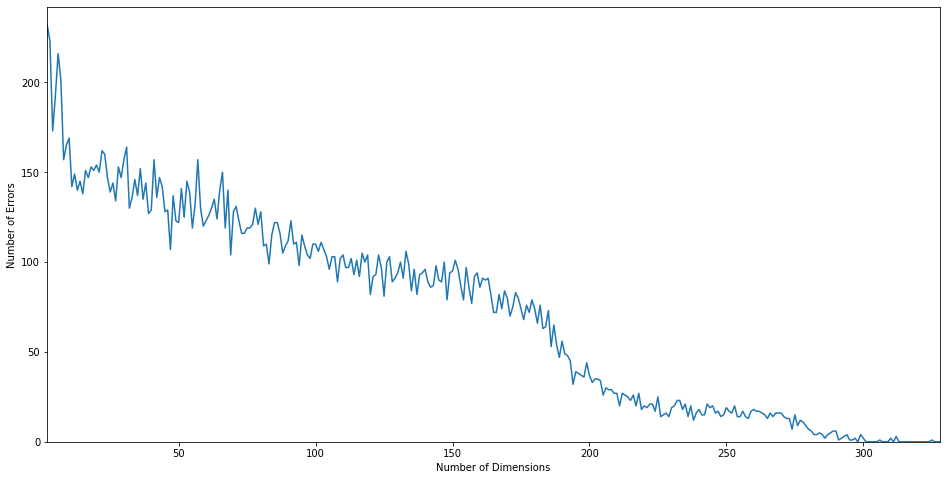

In [35]:
xAxis = np.zeros((X.shape[0] - 1))
for i in range(2, np.shape(X)[0] + 1):
    xAxis[i - 2] = np.shape(X)[0] + 1 - i # Gets the number of dimensions considered in an array
plt.figure(figsize = (16,8))
plt.xlim([2, X.shape[0] - 1] )
plt.ylim([0, np.max(chart) + 10])
plt.xlabel("Number of Dimensions")
plt.ylabel("Number of Errors")
plt.plot(xAxis, np.flip(chart,0)) # Creates a graph of the number of dimensions used and the number of errors for that dimensionality
plt.show()

**Discussions explaining if the dataset is linearly separable in the feature space defined by linear PCA and if it is linearly separable, the minimum number of top PCs needed:**\
For higher dimesnionalities defined by linear PCA the dataset is linearly sepereable. This can be seen where there is exactly or close to zero errors when around 300 or more dimensions are considered. As the dimensionality decreases the dataset no longer becomes linearly seperable as the number of errors increases as the dimensionality decreases. This can be seen in the graph above. \
When the number of iterations within the perceptron algorithm is increased the number of top PCs needed for the graph to be linearly separable decreases. This further shows the dataset is linearly separable in the feature space defined by linear PCA.

### Non-Linear PCA

**Implementation of the normalized kernel matrix:**\
The implementation of the normalized kernel matrix can be seen below. The L2 function calculates the sum of the squared distance between features in two feature vectors. This is used by the RBF kernel to calculate the relation between two feature vectors. To create the kernel matrix the relation between all examples are considered to create an nxn matrix. The formula specified in the coursework specification is then used to create the normalised kernel matrix (NK = K − AK − KA + (AK)A). Where A is a square matrix with the same dimensions as K and all values equal to 1/n.

In [27]:
# The radial basis function Kernel is used to generate the kernel matrix
def KernelRBF(xi, xj, gamma):
    return math.exp(-1 * gamma * L2(xi, xj))

# Gets the sum of the square error between feature vectors xi and xj
def L2(xi, xj):
    total = 0
    for i, j in zip(xi, xj):
        total = total + ((i - j) ** 2)
    return total


def KernelMatrix(Z_Train, gamma):
    K = np.zeros((Z_Train.shape[0],Z_Train.shape[0])) # Initilise a matrix K of size nxn
    indexI = 0
    for i in Z_Train:
        indexJ = 0
        for j in Z_Train:
            K[indexI][indexJ] = KernelRBF(i, j, gamma) # Do the KernelRBF for all between all examples in the training matrix
            indexJ = indexJ + 1
        indexI = indexI + 1
    return K

def NormalizedMatrix(K):
    A = np.full((np.shape(K)[0], np.shape(K)[0]), 1 / np.shape(K)[0]) # A is a square matrix with the same dimensions as K and all values equal to 1/n , where n is the number of samples in X.
    K = K - A@K - K@A + (A@K)@A
    return K

The below code creates a normalised kernel matrix with gamma = 0 for the RBF. The perceptron is then performed on the principle components generated, which are found by doing the SVD of the normalised kernel matrix then projecting to the PCs by doing Z = K*V.T. The below code considers the maximum dimesnionality.

In [28]:
K = KernelMatrix(X, 0.1) # Compute the kernel matrix for dataset X
K = NormalizedMatrix(K) # Compute the normalised kernel matrix for dataset X
U,S,V = PCA_decomp(K)
V = K @ V.T # The eigenvectors in V given by SVD are not PCs for kernel-PCA, but projection onto the actual PCs can be done using K and V
weights = perceptron(V,Y,10) # Get the weights obtained from 10 iterations of the perceptron algorithm
predictedclass = predict(V, weights) # Get the classes predicted from the calculated weights
print("Accuracy at dimensionality",(V.shape[1]),": ", 1 - (numWrong(Y, predictedclass) / X.shape[0]))

Accuracy at dimensionality 329 :  1.0


## Grid Search

**Matrix showing the results of the grid search:**\
We first have to find the minimum and maximum values of gamma. This is done by finding the variance for all feature columns and taking the minimum and maximum variances, and then calculating the gamma values using the formulas seen in the courswork specification. We then iterate through all values of gamma from the minimum gamma and incrementing by 0.01. For every gamma we use the perceptron algorithm for maximum dimensionality all the way to 13 dimensions. This is stored in a 2D array which is then displayed after all gammas have been explored. The resulting grid can be seen below.

In [43]:
def GammaMinMax(X):
    max = np.var(X.T[0]) 
    min = np.var(X.T[0])
    # Gets the minimum and maximum variance for each feature column in X
    for i in range(12):
        if np.var(X.T[i]) < min:
            min = np.var(X.T[i])
        if np.var(X.T[i]) > max:
            max = np.var(X.T[i])
    # Calculates te minimum and maximum gamma as stated on the coursework specification     
    maxG = 1 / (2 * (min - 0.05))
    minG = 1 / (2 * (max + 0.05))
    return minG, maxG
print("(Min Gamma, Max Gamma) =", GammaMinMax(X))

(Min Gamma, Max Gamma) = (0.01920499723800103, 0.08193924109967506)


The code below iterates over all gamma values and all dimensionalities for each gamma and stores the number of errors after using the perceptron algorithm to predict that classes. The errors are stored in a 2d array the size of the number of gammas by the number of dimensions considered.\
\
The values for gamma are 0.019, 0.029 0.039, 0.049, 0.059, 0.069, 0.079.

In [40]:
minG, maxG = GammaMinMax(X) # Get the gamma bounds for the grid search 
i = 0
grid = np.zeros((X.shape[0] - 12, 7))
while minG + i*0.01 <= maxG: # Increment gamma by 0.01 at a time
    K = KernelMatrix(X, minG + i*0.01) # Compute the kernel matrix for dataset X with gamma
    NK = NormalizedMatrix(K) # Compute the normalised kernel matrix for dataset X
    U,S,V = PCA_decomp(NK) 
    V = NK @ V.T # The eigenvectors in V given by SVD are not PCs for kernel-PCA, but projection onto the actual PCs can be done using K and V
    for j in range(12, X.shape[0]):
        weights = perceptron(V[:, :j],Y,10)
        predictedclass = predict(V[:, :j], weights)
        grid[j-12][i] = numWrong(Y, predictedclass)
    i = i + 1
    
    

The below code displays the 2D array in a graph. The color represents the number of errors at each gamma value and number of top PCs used.

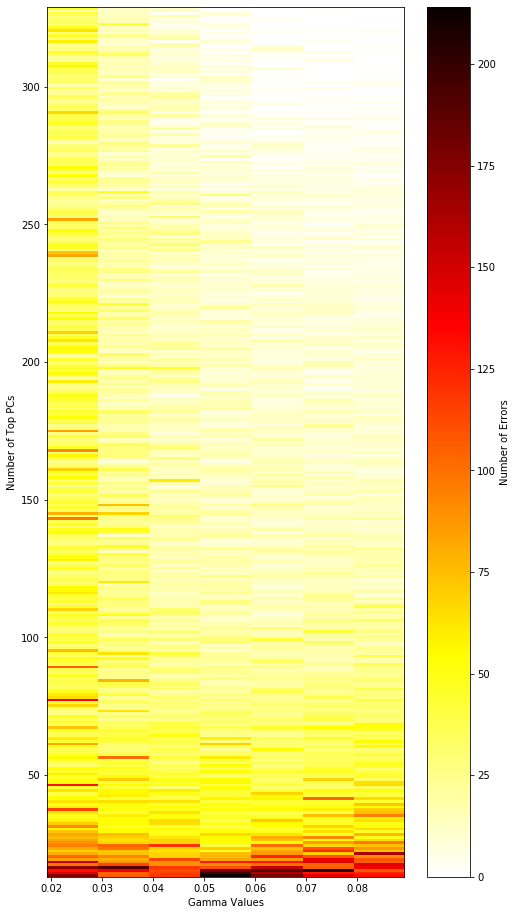

In the feature space defined by non-linear PCA with gamma = 0.05920499723800103 and 271 top PCs the dataset is linearly serperable, as there are no errors.


In [41]:
plt.figure(figsize = (8,16))
plt.xlabel("Gamma Values")
plt.ylabel("Number of Top PCs")
im = plt.imshow(np.flip(grid, 0) , cmap='hot_r', aspect='auto', extent=[minG, (minG + 0.01 * 7), 13, X.shape[0]]) # Shows the 2D array as an image
cbar = plt.colorbar(im) # Shows the colour bar key on the side of the image 
cbar.set_label("Number of Errors")
plt.show()
d = 0

# Gets the minimum number of top PCs needed for the dataset to be linearly separable and gets the value of gamma used
for i in range(np.shape(grid)[0]): # Start with the lowest number of top PCs
    for j in range(np.shape(grid)[1]): # Go through all gammas
        if (grid[i][j] == 0): # If there are no errors (if it is linearly separable)
            d = i # Store the number of top PCs
            gam = j # Store the value of gamma
            break
    if d > 0:
        break
print("In the feature space defined by non-linear PCA with gamma =", gam*0.01 + minG, "and", d, "top PCs the dataset is linearly serperable, as there are no errors.")
        

**Discussions explaining if the dataset is linearly separable in the feature space defined by non-linear PCA and if it is linearly separable, the gamma value and the minimum number of top PCs needed:**\
The dataset is linearly separable in the feature space defined by non-linear PCA and the value for gamma and the number of top PCs needed can be sen in the message above. These values can vary as the perceptron algorithm shuffles the examples before each iteration. But the values are usually in the range of 240 to 280 top PCs.
The grid search above shows the number of errors for each value of gamma and the number of top PCs. The more white the rectangle is the less errors there were for that gamma value and number of top PCs. As more top PCs are introduced the number of errors tends to be less. 